# Template Matching

Template matching is the simplest form of object detection. it simply scan a larger image for a provided template by sliding the template image across the larger image.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [8]:
full = cv2.imread('../DATA/sammy.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

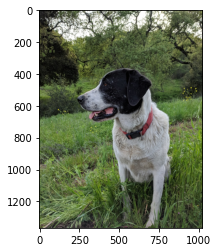

In [9]:
plt.imshow(full)

In [11]:
face = cv2.imread('../DATA/sammy_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

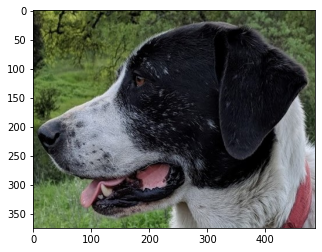

In [12]:
plt.imshow(face)

In [13]:
full.shape

(1367, 1025, 3)

In [14]:
face.shape

(375, 486, 3)

In [15]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF',
           'cv2.TM_SQDIFF_NORMED']

In [17]:
height, width, channels = face.shape

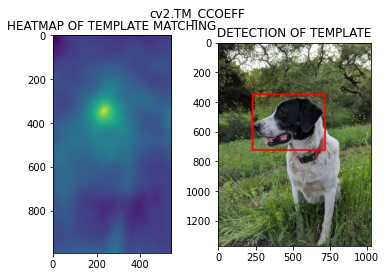

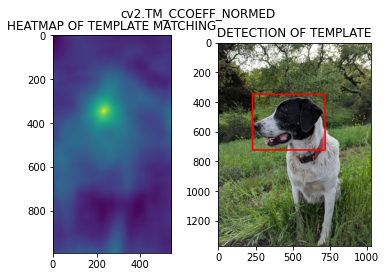

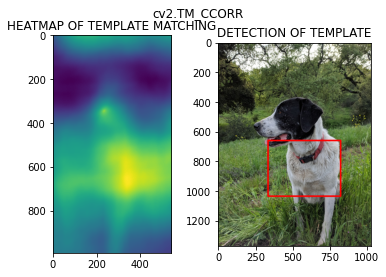

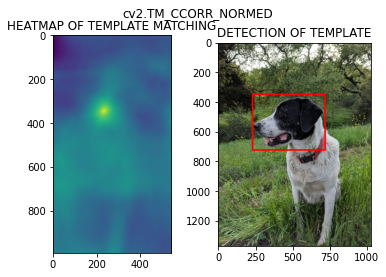

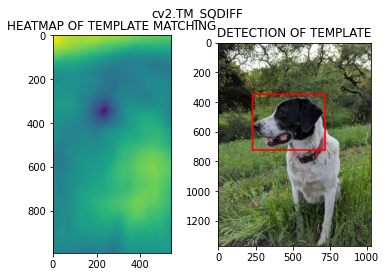

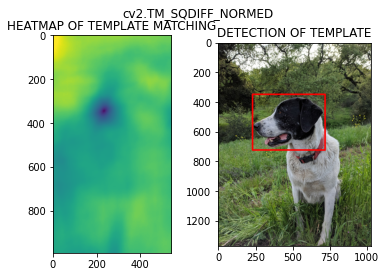

In [19]:
for m in methods:
    full_copy = full.copy()
    method = eval(m)

    # TEMPLATE MATCHING
    res = cv2.matchTemplate(full_copy, face, method)

    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    bottom_right = (top_left[0] + width, top_left[1] + height)

    cv2.rectangle(full_copy, top_left, bottom_right, 255, 10)

    plt.subplot(121)
    plt.imshow(res)
    plt.title('HEATMAP OF TEMPLATE MATCHING')

    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('DETECTION OF TEMPLATE')

    plt.suptitle(m)

    plt.show()

    print('\n')
    print('\n')